## Evaluating performance of multi-layer NN and CNN on Fashion-MNIST dataset 


#### Basic imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### loading fashion-MNIST data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion = input_data.read_data_sets('data\\fashion', one_hot = True)

Extracting data\fashion\train-images-idx3-ubyte.gz
Extracting data\fashion\train-labels-idx1-ubyte.gz
Extracting data\fashion\t10k-images-idx3-ubyte.gz
Extracting data\fashion\t10k-labels-idx1-ubyte.gz


##### shapes of different dataset partition
dataset size: images and correspodning labels

In [3]:
#dataset size: images and correspodning labels
print('shape of training image set: {train} | train label set: {train_label}'.format(train= fashion.train.images.shape, train_label= fashion.train.labels.shape))
print('shape of test image set: {test} | test label set: {test_label}'.format(test= fashion.test.images.shape, test_label= fashion.train.labels.shape))

shape of training image set: (55000, 784) | train label set: (55000, 10)
shape of test image set: (10000, 784) | test label set: (55000, 10)


#### defining image labeles

In [4]:
targets= dict(zip([0,1,2,3,4,5,6,7,8,9],'T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot'.split(',')))
print(targets)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


#### Visualizing a sample image and label corresponding to the image

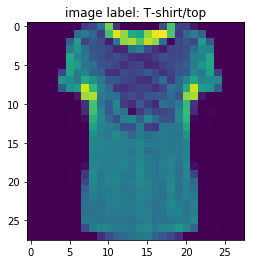

In [5]:
plt.imshow(fashion.train.images[1].reshape(28,28))
plt.title('image label: '+targets[np.where(fashion.train.labels[1]==1)[0][0]])
plt.show()

### Defining placholders for storing image data and labels

In [6]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape=[None, 10])

### Ease of definition functions for defining Weights and Bias parameters

In [7]:
def weights(name, shape):
    #with tf.variable_scope("weights"):#, reuse=True):
    ini = tf.get_variable(name, shape, initializer= tf.contrib.layers.xavier_initializer())#tf.truncated_normal(shape,stddev=0.1)
    return ini
def bias(name, shape):
    #with tf.variable_scope("biases"):#, reuse=True):
    ini = tf.get_variable(name, shape, initializer= tf.zeros_initializer())
    return ini

### function for defining structure of Neural Network
this function is also responsible for perform forward propagation during training

In [8]:
#after correction
def network_layers(X, neuron_count): # ex: units_per_layer = [784,128,64,28]
    #x = tf.placeholder(tf.float32, shape=[None, neuron_count[0]]) #neuron_count[0]= no. of neurons in input layer = num of image pixels i.e. 784
    #y_true = tf.placeholder(tf.float32, shape=[None, neuron_count[-1]]) #neuron_count[-1]= no. of neurons in output layer = total no. of labels i.e. 10
    
    hidden_layer_count = len(neuron_count) - 2 # intermediate layers excluding input and output layers neuron_count[0] &[-1]
    units_per_layer= neuron_count[1:] #units_per_layer = all layers except input i.e., [128,64,28]   
    layers = [X] #layers, a list that holds each network layer, initially just input layer[0]= x, shaped [None, 784]
    params = [] 
    b_params = [] #b_params, list holding each network layer's bias parameter, 1st vector shaped [1 x neurons in units_per_layer[0]] i.e. [1,128]
    print('Number of hidden layers defined: ', hidden_layer_count)
    print('Number of Neurons per layer: ', units_per_layer)
    print('no. parameter matrices & bias vectors added to list prior to network definition: ',len(params),',',len(b_params),'\n pre-network definition block 1: done \n')
    
    for num in range(hidden_layer_count): #will loop over twice for 2 hidden layer of size 128 and 64 neurons
        d= [int(layers[num].shape[1]), units_per_layer[num]] #d = shape vector correspoding params for each layer, @ num= 0, d= [784,128]
        params.append(weights('weights'+str(num+1), d))#params[0] shaped [784,128] corresponds to layer 1
        print('param: ',num+1, ' is named: ',params[num])
        
        e= [1, units_per_layer[num]] #e = shape vector correspoding to bias for each layer, e= [1,128]
        b_params.append(bias('biases'+str(num+1), e)) #b_params[0] shaped [1,128] corresponds to layer 1
        print('bias: ',num+1, 'is named: ',b_params[num])
        
        #layer[0] shaped [None,784], params[0] shaped [784,28], biase[0] shaped [1,28]
        weighted_sum = tf.matmul(layers[num], params[num]) + b_params[num] #matmul op shaped [none,128] for 1st hidden layer
        layers.append(tf.nn.relu(weighted_sum)) #layer[1] is shaped [None, 128]
        
        print('layer: {_} is shaped : {l_shape}'.format(_= num+1, l_shape= layers[num+1].shape))
        print('params {_} is shaped: {p_shape} & bias_params {_} is shaped: {b_shape} \n'.format(_= num+1, p_shape= params[num].shape,b_shape= b_params[num].shape))
        
    params.append(weights('final_weights', [int(layers[-1].shape[1]), units_per_layer[-1]]))#appeding final predition layer weights 
    b_params.append(bias('final_bias', [1, units_per_layer[-1]]))
    
    prediction_layer = tf.matmul(layers[-1], params[-1]) + b_params[-1] #weights('final_weights', [int(layer[-1].shape[1]), units_per_layer[-1]])) + bias('final_bias', [1, units_per_layer[-1]])
    layers.append(prediction_layer)    
    print('final layer is shaped: {l_shape}'.format(l_shape= layers[-1].shape))
    print('final weight is shaped: {p_shape} & bias_params is shaped: {b_shape} \n'.format(p_shape= params[-1].shape,b_shape= b_params[-1].shape))
    print('layers list size: ', len(layers), '| params list size: ',len(params),'| bias list size:', len(b_params),'\n')
    
    print('Zipping params and Bias_params into a list of tuples as "Parameters". . .')
    parameters = zip(params, b_params) # ex- [(weights1, bias1), (weights2, bias2)]


    return [layers, parameters]#, prediction_layer]

In [9]:
#tf.reset_default_graph()
#a,b = network_layers(x,[784,128,64,10]) 

### A final model function
###### that calls parameters from subordinate function during forward pass of training data and Backpropagating errors to perform parameters(Weights and bias) updation.

In [10]:
def model(train_data,test_data, neuron_count , learn_rate, epoch_count, batch_size):
    tf.reset_default_graph()
    x= tf.placeholder(tf.float32, shape=[None, neuron_count[0]]) #train_data
    y_true= tf.placeholder(tf.float32, shape=[None, neuron_count[-1]])#train_label    
    
    #forward passing train data
    #all_layers = network_layers(neuron_count)[0]
    layers, parameters= network_layers(x ,neuron_count) # network_layers returns [layers, parameters]
    y_prediction = layers[-1] #prediction_layer is last element of returned layers listi.e. layers[-1]
    pred_accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_prediction,1), tf.argmax(y_true,1)), tf.int32))
    #prediction loss & thereafter backpropagating the loss through weight optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= y_true, logits= y_prediction))
    optimizer = tf.train.AdamOptimizer(learn_rate).minimize(cost)
    
    init= tf.global_variables_initializer() 
                              #initilize all variables
    
    #for testing this funtion on small data
    num_batches = 10 # (x.shape[0])/(batch_size) # (total no. of images)/(no.of images in a batch)
    
    acc_timeline= []
    cost_timeline = [] #storing the spectrum of loss after every epoch
    with tf.Session() as sess:
        sess.run(init)
        for num in range(epoch_count):
            epoch_cost=0
            for i in range(num_batches):
                batchX, batchY = train_data.next_batch(batch_size)#train_image.next_batch(batch_size),train_label.next_batch(batch_size) #, train_label.next_batch(batch_size)]            
                temp, batch_cost,acc  = sess.run([optimizer, cost, pred_accuracy] ,{x:batchX, y_true:batchY})
                epoch_cost+= batch_cost/num_batches
            print('Cost at epoch {epoch}, train accuracy: {acc}'.format(epoch= num, acc= acc))
            acc_timeline.append(acc) #appending accuracy value after every epoch
            cost_timeline.append(epoch_cost) #appending cost value after every epoch
                        
        print('All parameters have been learned! \n')
        print('Gross training accuracy on dataset of {size} is: {acc}'.format(size= train_data.images.shape[0],
                                                        acc= pred_accuracy.eval({x:train_data.images, y_true: train_data.labels})))
        print('Gross training accuracy on dataset of {size} is: {acc}'.format(size= test_data.images.shape[0],
                                                        acc= pred_accuracy.eval({x:test_data.images, y_true: test_data.labels})))
    
    #a= raw_input('type: "y" ,to return the learned parameters or "n" to exit')
    #if(a== 'Y'):
        
          
        
    
    #plt.figure(figsize=(16,5))
    #plt.plot(np.squeeze(cost_timeline))#, color='#2A688B')
    #plt.xlim(0, num_epochs-1)
    #plt.ylabel("prediction_cost")
    #plt.xlabel("iterations")
    #plt.title("Cost curve at learning rate = {rate}".format(rate=learn_rate))
    #plt.savefig(graph_filename, dpi=300)
    #plt.show()
    
    #plt.figure(figsize=(16,5))
    #plt.plot(np.squeeze(acc_timeline))#, color='#2A688B')
    #plt.xlim(0, num_epochs-1)
    #plt.ylabel("prediction_cost")
    #plt.xlabel("epochs")
    #plt.title("Accuracy curve at learning rate = {rate}".format(rate=learn_rate))
    #plt.savefig(graph_filename, dpi=300)
    #plt.show()
    
        parameters = sess.run(parameters)
    
        return parameters


In [13]:
p1= model(fashion.train,fashion.test,[784,64,28,10],0.0001, 2, 30)

Number of hidden layers defined:  2
Number of Neurons per layer:  [64, 28, 10]
no. parameter matrices & bias vectors added to list prior to network definition:  0 , 0 
 pre-network definition block 1: done 

param:  1  is named:  <tf.Variable 'weights1:0' shape=(784, 64) dtype=float32_ref>
bias:  1 is named:  <tf.Variable 'biases1:0' shape=(1, 64) dtype=float32_ref>
layer: 1 is shaped : (?, 64)
params 1 is shaped: (784, 64) & bias_params 1 is shaped: (1, 64) 

param:  2  is named:  <tf.Variable 'weights2:0' shape=(64, 28) dtype=float32_ref>
bias:  2 is named:  <tf.Variable 'biases2:0' shape=(1, 28) dtype=float32_ref>
layer: 2 is shaped : (?, 28)
params 2 is shaped: (64, 28) & bias_params 2 is shaped: (1, 28) 

final layer is shaped: (?, 10)
final weight is shaped: (28, 10) & bias_params is shaped: (1, 10) 

layers list size:  4 | params list size:  3 | bias list size: 3 

Zipping params and Bias_params into a list of tuples as "Parameters". . .
Cost at epoch 0, train accuracy: 0
Cost a

TypeError: Fetch argument <zip object at 0x000002A07049BC48> has invalid type <class 'zip'>, must be a string or Tensor. (Can not convert a zip into a Tensor or Operation.)

## Evaluating fashion-dataset on CNN

### Ease-Function for defining Weights, biases, convolution and pooling layers 

In [14]:
def c_weights(shape):
    ini = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(ini)
def c_bias(shape):
    ini = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(ini)

In [15]:
def conv2d(x,W):
    return tf.nn.conv2d(x,W, strides=[1,1,1,1], padding='SAME')

def pool(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

### Defining our CNN model: 
 ##### 1. setting weights & bias for CNN-1;
 ##### 2. computing the outputs for CNN-1
 ##### 3. computing the outputs for Pool-1

In [18]:
tf.reset_default_graph()
x_image = tf.reshape(x, [-1,28,28,1])
w_conv1 = c_weights([5,5,1,32]) #the number of channels formed in 1st conv layer will be 32, each size 14x14 after pool1
b_conv1= c_bias([32])
print(w_conv1, b_conv1)

<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(32,) dtype=float32_ref>


In [19]:
h_conv1= tf.nn.relu(conv2d(x_image,w_conv1)+ b_conv1) #shape 28x28x32
pool_1= pool(h_conv1) #shape 14x14x32

ValueError: Tensor("Reshape_1:0", shape=(?, 28, 28, 1), dtype=float32) must be from the same graph as Tensor("Variable:0", shape=(5, 5, 1, 32), dtype=float32_ref).

In [131]:
h_conv1.shape # 1st dim is the number of images in a batch

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(32)])

 ##### 1. setting weights & bias for CNN-2;
 ##### 2. computing the outputs for CNN-2;
 ##### 3. computing the outputs for Pool-2;

In [25]:
w_conv2 = c_weights([5,5,32,64]) #will produce 64 channels in 2nd conv layer, w_conv2 shape [5x5x32, 64]
b_conv2 = c_bias([64])

In [26]:
h_conv2 = tf.nn.relu(conv2d(pool_1, w_conv2)+ b_conv2) #here input is pool_1. shape 14x14x32, shape of 1 of 64 kernel applied is [5x5x32]h_conv2 will have shape 14x14x64
pool_2 = pool(h_conv2) #2nd pooling layer, output shape 7x7x64


In [27]:
print(w_conv2, b_conv2, h_conv2, pool_2 )

<tf.Variable 'Variable_4:0' shape=(5, 5, 32, 64) dtype=float32_ref> <tf.Variable 'Variable_5:0' shape=(64,) dtype=float32_ref> Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32) Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


 ##### 1. setting weights & bias for densely connected layer 1;
 ##### 2. reshaping [7,7,64] shaped tensor to a flattened [7x 7x64] dimenional vector;
 ##### 3. computing the outputs for fc-1;

In [28]:
w_fc1 = c_weights([7*7*64, 1024]) #weights for final layer, weight shape [7*7*64 x 1024]
b_fc1= c_bias([1024])
print('Weight & bias shapes for fc layer', w_fc1, b_fc1)

Weight & bias shapes for fc layer <tf.Variable 'Variable_6:0' shape=(3136, 1024) dtype=float32_ref> <tf.Variable 'Variable_7:0' shape=(1024,) dtype=float32_ref>


In [29]:
pool_fc_flat = tf.reshape(pool_2, [-1, 7*7*64]) #pool_2 layer had been flattened to 7*7*64 vector for one image
h_fc1 = tf.nn.relu(tf.matmul(pool_fc_flat, w_fc1)+ b_fc1) #matmul of pool2_flat(shaped[1, 7*7*64]) and 
                                           #w_fc1(shaped[7*7*64, 1024] yields a  result matrix h_fc1 shaped [1,1024] for each image)

In [140]:
print('pool fc flat & h_fc1 shape: '), pool_fc_flat.shape, h_fc1.shape

pool fc flat & h_fc1 shape: 


(None,
 TensorShape([Dimension(None), Dimension(3136)]),
 TensorShape([Dimension(None), Dimension(1024)]))

In [141]:
print('w_fc1 & b_fc1 shape: '), w_fc1.shape, b_fc1.shape

w_fc1 & b_fc1 shape: 


(None,
 TensorShape([Dimension(3136), Dimension(1024)]),
 TensorShape([Dimension(1024)]))

 ##### 1. performing dropout on output of previous layer(fc1) to prevent overfitting on training dataset;
 ##### 2. setting weights & bias for final fully connected prediction layer;
 ##### 3. computing the outputs for y_pred by mapping outputs of fc1 to fc2  by performing at weighted sum of fc1 output shaped [1,1024] and
#####       fc2weights shaped [1024,10];

In [31]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob) #adding a dropout to h_fc1 layer shaped [1, 1024] for each image 

In [32]:
w_fc2 = c_weights([1024,10]) #weight matrix to map h_Fc1 shaped [1,1024] to h_Fc2 shaped [1,10]
b_fc2 = c_bias([10])

In [33]:
y_pred = tf.matmul(h_fc1_drop, w_fc2) + b_fc2 # prediction vector layer y_pred shaped [1,10] for 1 input image

In [142]:
y_pred.shape

TensorShape([Dimension(None), Dimension(10)])

### training layers & updating wieghts & biases

In [34]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_pred))

In [203]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [231]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(140):
        batch = fashion.train.next_batch(20)
        if i%10 ==0:
            train_acc = accuracy.eval({x:batch[0], y_:batch[1], keep_prob:1.0})
            print('train accuracy after ',i*20, 'images is:', train_acc)
        train_step.run({x:batch[0], y_:batch[1], keep_prob:0.5})
    print('test data accuracy', accuracy.eval({x: fashion.test.images[1:21], y_:fashion.test.labels[1:21], keep_prob:1.0}))

train accuracy after  0 images is: 0.15
train accuracy after  200 images is: 0.15
train accuracy after  400 images is: 0.35
train accuracy after  600 images is: 0.5
train accuracy after  800 images is: 0.55
train accuracy after  1000 images is: 0.5
train accuracy after  1200 images is: 0.95
train accuracy after  1400 images is: 0.6
train accuracy after  1600 images is: 0.65
train accuracy after  1800 images is: 1.0
train accuracy after  2000 images is: 0.65
train accuracy after  2200 images is: 0.85
train accuracy after  2400 images is: 0.8
train accuracy after  2600 images is: 0.8
test data accuracy 0.8


In [237]:
accuracy.eval({x:mnist.train.images[2400:2601], y_:mnist.train.labels[2400:2601], keep_prob:1.0})

0.099502489

In [61]:
w_fc1, w_fc2, b_fc2, y_pred

(<tf.Variable 'Variable_6:0' shape=(3136, 1024) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(1024, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(10,) dtype=float32_ref>,
 <tf.Tensor 'add_4:0' shape=(?, 10) dtype=float32>)

In [230]:
print(y_pred.eval({x:fashion.train.images[1:3],keep_prob:1.0}))
print('random datapoints predictions vs. label match is found to be : ', correct_prediction.eval({x:fashion.train.images[1:3],
y_:fashion.train.labels[1:3],keep_prob:1.0}),'\nmax probability positions in y_pred and y_ are: ' ,
tf.argmax(y_pred,1).eval({x:fashion.train.images[1:3], keep_prob:1.0}), tf.argmax(fashion.train.labels[1:3],1).eval())

[[ 1.31374872  3.30314469  3.84198737 -2.11247444  4.78950644  0.19314094
   4.47027588 -1.2290597   1.04318416 -5.097332  ]
 [ 0.95248878  0.8565222   2.70032001 -0.57708746  3.56639004  3.16016126
   1.06598711 -2.27347255  2.6269505  -7.79926586]]
random datapoints predictions vs. label match is found to be :  [False False] 
max probability positions in y_pred and y_ are:  [4 4] [7 2]
